In [672]:
import pandas as pd
dataset=pd.read_csv("C:/Users/Harshini/Documents/Decision Tree + Random Forest + Ensemble Techniques/admission.csv")
df=pd.DataFrame(dataset)
df
 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [673]:
import warnings
warnings.filterwarnings('ignore')


In [674]:
df=df.drop("Serial No.",axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [675]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [676]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Q1.Perform Exploratory Data Analysis (EDA) tasks 

### a. Visualize the 10 random rows of the data set

In [677]:
df=df.sample(n=10 , replace = True)
df




,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
206,315,99,2,3.5,3.0,7.89,0,0.63
125,300,100,3,2.0,3.0,8.66,1,0.64
444,324,113,5,4.0,5.0,9.25,1,0.92
75,329,114,2,2.0,4.0,8.56,1,0.72
417,316,103,3,3.5,2.0,7.68,0,0.52
479,325,110,4,4.5,4.0,8.96,1,0.79
271,299,96,2,1.5,2.0,7.86,0,0.54
161,298,99,1,1.5,3.0,7.46,0,0.53
326,299,100,3,2.0,2.0,8.02,0,0.63
33,340,114,5,4.0,4.0,9.60,1,0.90


### b.Generate the description for numeric variables

In [678]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,314.500000,104.800000,3.000000,2.850000,3.200000,8.394000,0.500000,0.682000
std,15.005555,7.130529,1.333333,1.155903,1.032796,0.720111,0.527046,0.146803
min,298.000000,96.000000,1.000000,1.500000,2.000000,7.460000,0.000000,0.520000
25%,299.250000,99.250000,2.000000,2.000000,2.250000,7.867500,0.000000,0.562500
50%,315.500000,101.500000,3.000000,2.750000,3.000000,8.290000,0.500000,0.635000
75%,324.750000,112.250000,3.750000,3.875000,4.000000,8.885000,1.000000,0.772500
max,340.000000,114.000000,5.000000,4.500000,5.000000,9.600000,1.000000,0.920000


### c.Check the shape of the data set

In [679]:
df.shape

(10, 8)

### d.Generate the correlation matrix

In [680]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.904486,0.633099,0.738287,0.709784,0.735622,0.639246,0.774750
TOEFL Score,0.904486,1.000000,0.666150,0.589109,0.835855,0.809903,0.798272,0.853833
University Rating,0.633099,0.666150,1.000000,0.756984,0.564810,0.859821,0.632456,0.840128
SOP,0.738287,0.589109,0.756984,1.000000,0.539821,0.593480,0.410365,0.660027
LOR,0.709784,0.835855,0.564810,0.539821,1.000000,0.787624,0.816497,0.876475
CGPA,0.735622,0.809903,0.859821,0.593480,0.787624,1.000000,0.895840,0.948068
Research,0.639246,0.798272,0.632456,0.410365,0.816497,0.895840,1.000000,0.804196
Chance of Admit,0.774750,0.853833,0.840128,0.660027,0.876475,0.948068,0.804196,1.000000


In [681]:
import numpy as np
a=np.corrcoef(df)
(a)

array([[1.        , 0.99980771, 0.99947819, 0.99947635, 0.99991997,
        0.99975001, 0.99994987, 0.99980612, 0.99977266, 0.9998006 ],
       [0.99980771, 1.        , 0.9998843 , 0.99989451, 0.99994842,
        0.99996623, 0.99994076, 0.99998165, 0.99998997, 0.99998152],
       [0.99947819, 0.9998843 , 1.        , 0.99996389, 0.99977834,
        0.99994548, 0.99968068, 0.99987517, 0.99991085, 0.99991446],
       [0.99947635, 0.99989451, 0.99996389, 1.        , 0.99975453,
        0.99991946, 0.99969556, 0.99991343, 0.99990294, 0.99987917],
       [0.99991997, 0.99994842, 0.99977834, 0.99975453, 1.        ,
        0.99993919, 0.99996749, 0.99993005, 0.99994946, 0.99996281],
       [0.99975001, 0.99996623, 0.99994548, 0.99991946, 0.99993919,
        1.        , 0.99986898, 0.99995788, 0.99997729, 0.99998866],
       [0.99994987, 0.99994076, 0.99968068, 0.99969556, 0.99996749,
        0.99986898, 1.        , 0.99992445, 0.99991642, 0.99991444],
       [0.99980612, 0.99998165, 0.9998751

### e.Generate a correlogram

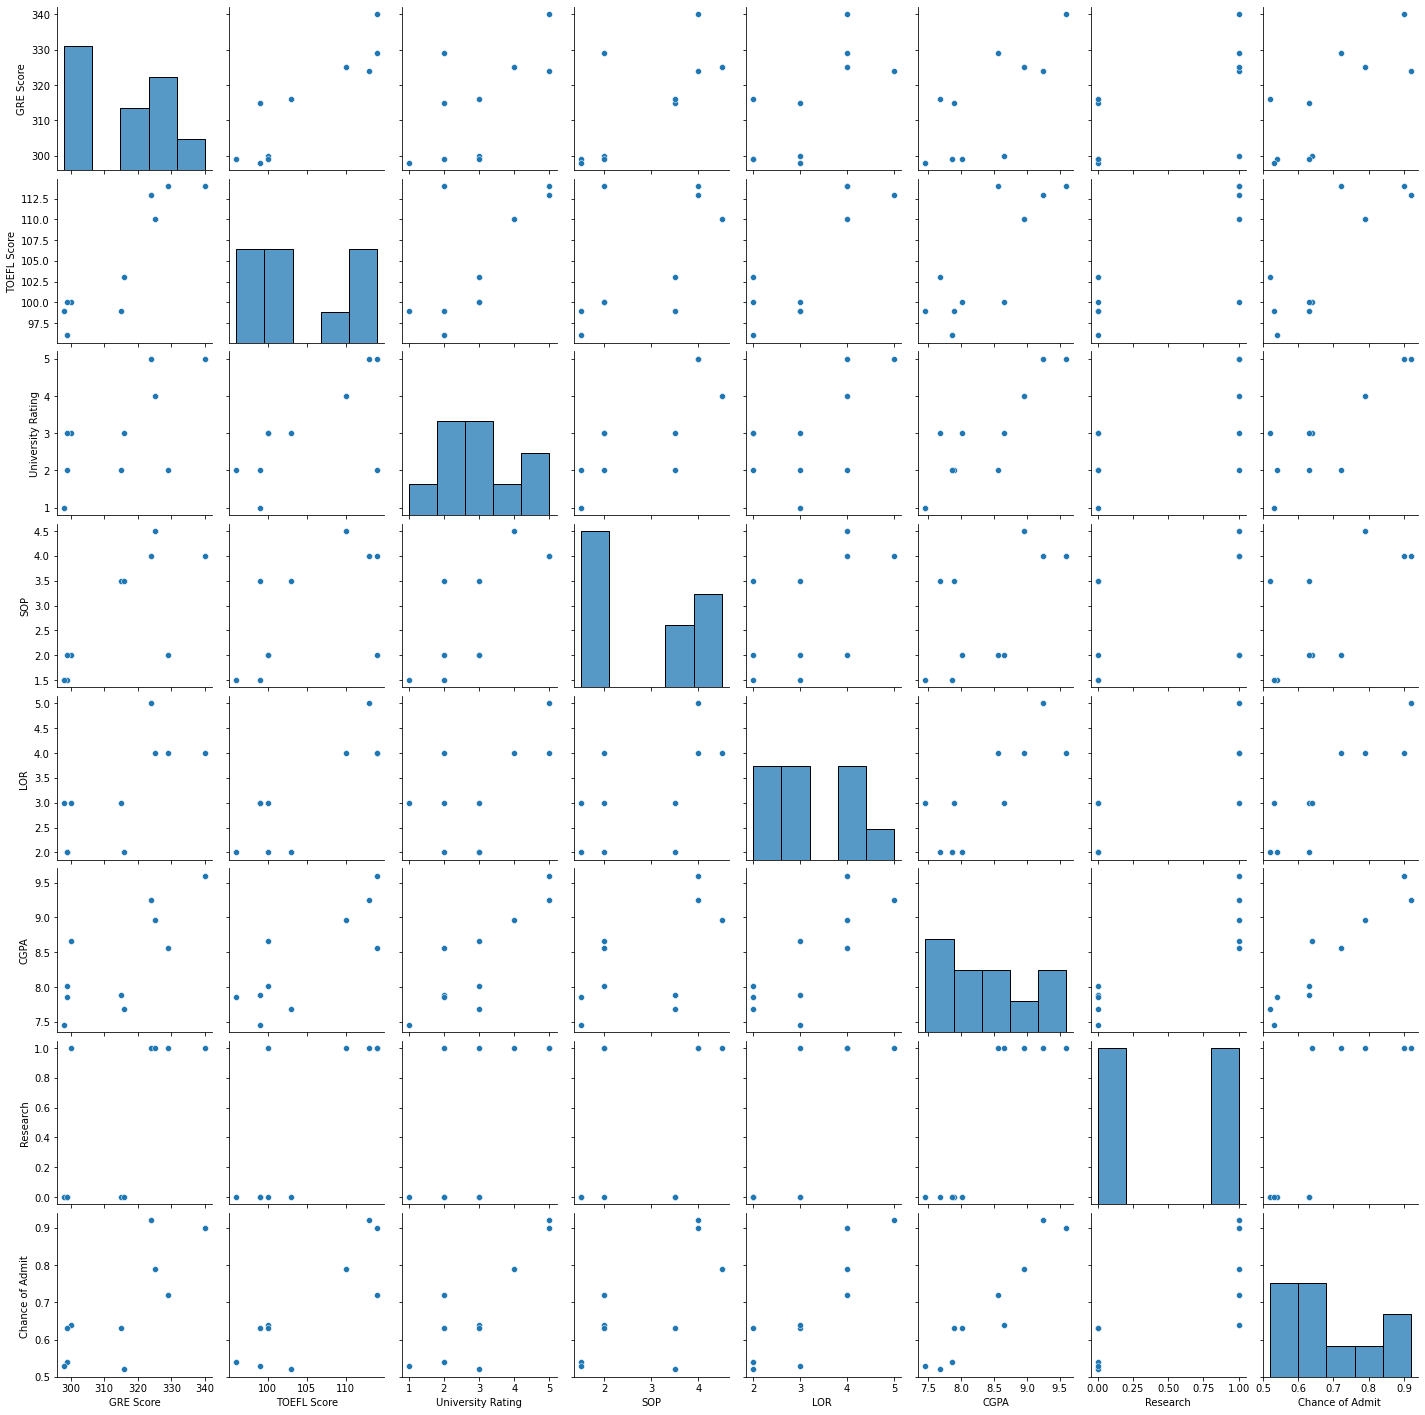

In [682]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

<AxesSubplot:>

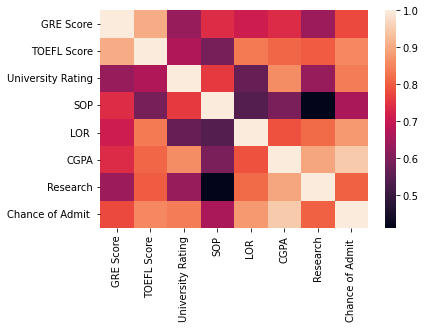

In [683]:
sns.heatmap(df.select_dtypes(['float64','int64']).corr())

### Q2.Find out the minimum and maximum values for GRE Score


In [684]:
q=df['GRE Score'].values

In [685]:
print('Maximum of GRE Score is: ',df['GRE Score'].max())

Maximum of GRE Score is:  340


In [686]:
print('Minimum of GRE Score is: ',df['GRE Score'].min())

Minimum of GRE Score is:  298


### Q3. Find out the percentage of universities for each university rating

In [687]:
import pandas as pd
dataset=pd.read_csv("C:/Users/Harshini/Documents/Decision Tree + Random Forest + Ensemble Techniques/admission.csv")
df=pd.DataFrame(dataset)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [688]:
df['perc']=df['University Rating']/df['University Rating'].sum()*100
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,perc
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.256904
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.256904
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.192678
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.192678
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.128452
...,...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87,0.321130
496,497,337,117,5,5.0,5.0,9.87,1,0.96,0.321130
497,498,330,120,5,4.5,5.0,9.56,1,0.93,0.321130
498,499,312,103,4,4.0,5.0,8.43,0,0.73,0.256904


### Q4.Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that 

In [689]:
d=df['Chance of Admit '].values

In [690]:
for i in range(0,len(d)):
    if(d[i]>0.80):
        d[i]=1
    elif(d[i]<0.80):
        d[i]=0

In [691]:
d

array([1. , 0. , 0. , 0.8, 0. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 1. , 1. ,
       0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 1. ,
       1. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0.8, 0. , 1. , 1. , 1. ,
       1. , 0.8, 1. , 0. , 1. , 1. , 0. , 1. , 1. , 1. , 0. , 0.8, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ,
       0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0.

In [692]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,perc
0,1,337,118,4,4.5,4.5,9.65,1,1.0,0.256904
1,2,324,107,4,4.0,4.5,8.87,1,0.0,0.256904
2,3,316,104,3,3.0,3.5,8.00,1,0.0,0.192678
3,4,322,110,3,3.5,2.5,8.67,1,0.8,0.192678
4,5,314,103,2,2.0,3.0,8.21,0,0.0,0.128452
...,...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1.0,0.321130
496,497,337,117,5,5.0,5.0,9.87,1,1.0,0.321130
497,498,330,120,5,4.5,5.0,9.56,1,1.0,0.321130
498,499,312,103,4,4.0,5.0,8.43,0,0.0,0.256904


### Q5.Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
 9   perc               500 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 39.2 KB


In [694]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Chance of Admit ']=le.fit_transform(df['Chance of Admit '])

In [695]:
x=df.drop(['Chance of Admit '],axis=1).values
y=df['Chance of Admit '].values

In [696]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [697]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((375, 9), (125, 9), (375,), (125,))

In [698]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [699]:
y_pred=model.predict(x_test)
print(y_pred)

[0 2 2 2 0 0 0 0 0 0 0 0 0 1 2 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 0 0 2 2 0 0 1 2 2 0 0 0 0 0 2 0 2 0 2 0 0 0 2 0 2 0 0 0 2 0 2 2 2 0 0
 2 2 0 0 0 0 0 2 0 0 1 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 1 0 0 2 0 0 0
 0 0 0 0 2 0 2 2 2 0 0 2 2 0]


In [700]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.896

In [701]:
from sklearn.metrics import confusion_matrix,classification_report

In [702]:
confusion_matrix(y_pred,y_test)

array([[83,  0,  3],
       [ 3,  2,  0],
       [ 5,  2, 27]], dtype=int64)

In [703]:
c=classification_report(y_pred,y_test)
print(c)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        86
           1       0.50      0.40      0.44         5
           2       0.90      0.79      0.84        34

    accuracy                           0.90       125
   macro avg       0.77      0.72      0.74       125
weighted avg       0.89      0.90      0.89       125



In [704]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [705]:
pca=decomposition.PCA()
sc=StandardScaler()

In [706]:
dt=tree.DecisionTreeClassifier()

In [707]:
pipe=Pipeline(steps=[('sc',sc),('pca',pca),('dt',dt)])

In [708]:
n_components=list(range(1,x.shape[1]+1,1))

In [709]:
criterion=['gini','entropy']
max_depth=[1,2,3,4,5]

In [710]:
p=dict(pca__n_components=n_components,dt__criterion=criterion,dt__max_depth=max_depth)

In [711]:
clf=GridSearchCV(pipe,p)

In [712]:
clf.fit(x,y)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [1, 2, 3, 4, 5],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [713]:
print('Best max_depth: ',clf.best_estimator_.get_params()['dt__max_depth'])

Best max_depth:  5


In [714]:
print('Best Criterion: ',clf.best_estimator_.get_params()['dt__criterion'])

Best Criterion:  entropy


In [715]:
print(clf.best_estimator_.get_params()['dt'])

DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [716]:
CV_result=cross_val_score(clf,x,y,cv=4, n_jobs=-1)

In [717]:
print(CV_result)
print(CV_result.mean())
print(CV_result.std())

[0.808 0.872 0.872 0.904]
0.864
0.034871191548325374


### Q6. Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university.

In [718]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Chance of Admit ']=le.fit_transform(df['Chance of Admit '])

In [719]:
x=df.drop(['Chance of Admit '],axis=1).values
y=df['Chance of Admit '].values

In [720]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [721]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [722]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=50)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=50)

In [723]:
y_pred=model.predict(x_test)

In [724]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[73,  0,  1],
       [ 3,  0,  1],
       [ 0,  0, 22]], dtype=int64)

In [725]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.95

In [726]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.00      0.00      0.00         4
           2       0.92      1.00      0.96        22

    accuracy                           0.95       100
   macro avg       0.63      0.66      0.64       100
weighted avg       0.91      0.95      0.93       100



### Q.7 Also use Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university

In [737]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [738]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit_transform(x)


array([[0.        , 0.94      , 0.92857143, ..., 0.91346154, 1.        ,
        0.75      ],
       [0.00200401, 0.68      , 0.53571429, ..., 0.66346154, 1.        ,
        0.75      ],
       [0.00400802, 0.52      , 0.42857143, ..., 0.38461538, 1.        ,
        0.5       ],
       ...,
       [0.99599198, 0.8       , 1.        , ..., 0.88461538, 1.        ,
        1.        ],
       [0.99799599, 0.44      , 0.39285714, ..., 0.5224359 , 0.        ,
        0.75      ],
       [1.        , 0.74      , 0.75      , ..., 0.71794872, 0.        ,
        0.75      ]])

In [739]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10))

In [740]:
y_pred=model.predict(x_test)

In [741]:
from sklearn import metrics
bagging_score = metrics.roc_auc_score(y_pred, y_test)
print(bagging_score)

0.9407484407484408


### Q8.Compare all of the models and justify your choice about the optimum model

In [ ]:
By Above analysis we come to a conclusion that Random Forest Model has the highest accuracy score with 95.0%